In [3]:
import pandas as pd

df_title =  pd.read_csv("data/galica_mon_sampling_title.csv", index_col = [0])

In [4]:
# Clean the dates

def calculate_center(date_range):

    if '-????'or "-18." in date_range:
        date_range = date_range.replace('-????',"")
        date_range = date_range.replace("-18.","")

    if '-' in date_range:
        try:
            start, end = map(int, date_range.split('-'))
            res  = int(start) + (int(end) - int(start)) // 2
        except:
            res = date_range
    else:
        res = date_range
    return res


# Replace date ranges with their centers
#df_title['clean_date'] = df_title['date'].apply(calculate_center)
df_title = df_title[~df_title['date'].str.contains('-')]
df_title['date'] = df_title['date'].astype(int)
#df_title = df_title[~df_title['clean_date'].isna()]
#df_title = df_title[df_title['clean_date']!='1843.']
#df_title = df_title[df_title['clean_date']!='1829-183.']
#df_title['clean_date'] = df_title['clean_date'].astype(int)

In [8]:
# Define a function to categorize dates
def categorize_date(date):
    date = int(date)
    if date < 1850:
        return 'before 1850'
    elif 1850 <= date <= 1900:
        return '1850-1900'
    else:
        return 'after 1900'
    
df_title['date_category'] = df_title['date'].apply(categorize_date)
df_title.date_category.value_counts()

date_category
1850-1900      12958
before 1850     8588
after 1900      4764
Name: count, dtype: int64

In [7]:
df_title[df_title['date']==min(df_title['date'])]

,file_id,ocr,title,date,author,page_count,word_count,character_count,date_category
19767,bpt6k97689386,97,"Les Cris de Paris [, par Antoine Truquet]",1545,"Truquet, Antoine",62,3492,21801,before 1850


<Axes: >

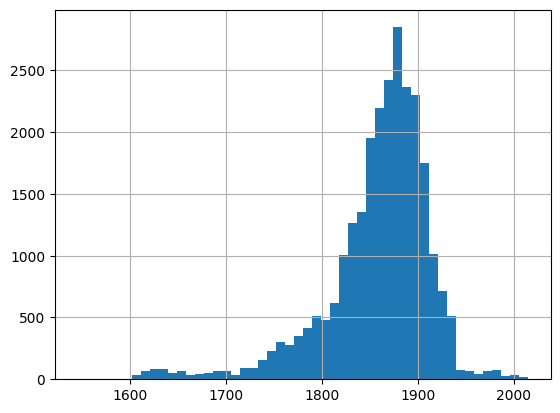

In [10]:
df_title.date.hist(bins=50)